In [ ]:
# Extraemos y transformamos datos de la API de CoinGecko.
# Realizamos un análisis exploratorio de datos (EDA) con gráficos y estadísticas.
# Preparamos el dataset con limpieza, creación de nuevas características y análisis de correlación.
# Guardamos el dataset final en un archivo CSV.

#ToDO Api key
#Hcaer cuenta en OpenWeatheMap, y obtener una API KEY para aplicarla en el código.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
url = 'https://api.coingecko.com/api/v3/coins/markets'

In [3]:
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 50,
    'page': 1,
    'sparkline': 'false'
}

In [8]:
response = requests.get(url, params=params)
response

<Response [200]>

In [9]:
data = response.json()
data

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400',
  'current_price': 68743,
  'market_cap': 1359606597678,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1443880907015,
  'total_volume': 29372284894,
  'high_24h': 69218,
  'low_24h': 67467,
  'price_change_24h': 983.77,
  'price_change_percentage_24h': 1.45186,
  'market_cap_change_24h': 19748015650,
  'market_cap_change_percentage_24h': 1.47389,
  'circulating_supply': 19774303.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 73738,
  'ath_change_percentage': -7.24002,
  'ath_date': '2024-03-14T07:10:36.635Z',
  'atl': 67.81,
  'atl_change_percentage': 100770.5279,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2024-10-28T16:15:25.000Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://coin-images.coingecko.com/coins/images/279/large/ethereum.png?1

In [10]:
# Crear DataFrame
df = pd.DataFrame(data)
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,68743.000000,1359606597678,1,1443880907015,29372284894,69218.000000,...,2.100000e+07,2.100000e+07,73738.000000,-7.24002,2024-03-14T07:10:36.635Z,6.781000e+01,1.007705e+05,2013-07-06T00:00:00.000Z,None,2024-10-28T16:15:25.000Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2510.390000,302378175644,2,302378175644,14303171303,2537.880000,...,1.204033e+08,NaN,4878.260000,-48.77294,2021-11-10T14:24:19.604Z,4.329790e-01,5.770620e+05,2015-10-20T00:00:00.000Z,"{'times': 47.834584946232155, 'currency': 'btc...",2024-10-28T16:15:29.841Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.000000,120419044268,3,120419044268,35673215450,1.002000,...,1.203393e+11,NaN,1.320000,-24.56949,2018-07-24T00:00:00.000Z,5.725210e-01,7.431981e+01,2015-03-02T00:00:00.000Z,None,2024-10-28T16:15:26.285Z
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,592.440000,86458271465,4,86458271465,635640990,597.150000,...,1.458876e+08,2.000000e+08,717.480000,-17.78700,2024-06-06T14:10:59.816Z,3.981770e-02,1.481297e+06,2017-10-19T00:00:00.000Z,None,2024-10-28T16:15:25.191Z
4,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,174.330000,81845241835,5,102227302378,3672597748,178.090000,...,5.873998e+08,NaN,259.960000,-33.33929,2021-11-06T21:54:35.825Z,5.008010e-01,3.450269e+04,2020-05-11T19:35:23.449Z,None,2024-10-28T16:15:24.217Z
5,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,1.000000,34727542066,6,34728027482,4120494671,1.003000,...,3.469678e+10,NaN,1.170000,-14.80180,2019-05-08T00:40:28.300Z,8.776470e-01,1.384132e+01,2023-03-11T08:02:13.981Z,None,2024-10-28T16:15:26.863Z
6,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,0.514370,29193444895,7,51379532663,805131155,0.520947,...,9.998707e+10,1.000000e+11,3.400000,-84.89184,2018-01-07T00:00:00.000Z,2.686210e-03,1.901407e+04,2014-05-22T00:00:00.000Z,None,2024-10-28T16:15:22.879Z
7,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,2508.660000,24423791776,8,24423791776,28344898,2535.460000,...,9.746689e+06,NaN,4829.570000,-48.35232,2021-11-10T14:40:47.256Z,4.829000e+02,4.165419e+02,2020-12-22T04:08:21.854Z,None,2024-10-28T16:15:31.485Z
8,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.149429,21891046197,9,21893043447,2311860951,0.150241,...,1.465566e+11,NaN,0.731578,-79.80719,2021-05-08T05:08:23.458Z,8.690000e-05,1.698883e+05,2015-05-06T00:00:00.000Z,None,2024-10-28T16:15:27.254Z
9,tron,trx,TRON,https://coin-images.coingecko.com/coins/images...,0.163901,14165702724,10,14165745395,375779095,0.165720,...,8.647993e+10,NaN,0.231673,-29.51667,2018-01-05T00:00:00.000Z,1.804340e-03,8.949876e+03,2017-11-12T00:00:00.000Z,"{'times': 85.26356516605668, 'currency': 'usd'...",2024-10-28T16:15:30.630Z


In [12]:
# Columnas deseadas
columnas_deseadas = [
    'id', 'symbol', 'name', 'current_price', 'market_cap', 'total_volume',
    'high_24h', 'low_24h', 'price_change_percentage_24h',
    'price_change_percentage_7d', 'price_change_percentage_30d'
]
columnas_deseadas

['id',
 'symbol',
 'name',
 'current_price',
 'market_cap',
 'total_volume',
 'high_24h',
 'low_24h',
 'price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_30d']

In [13]:
# Filtrar solo las columnas que están presentes en el DataFrame
columnas_existentes = [col for col in columnas_deseadas if col in df.columns]
df = df[columnas_existentes]
df

,id,symbol,name,current_price,market_cap,total_volume,high_24h,low_24h,price_change_percentage_24h
0,bitcoin,btc,Bitcoin,68743.000000,1359606597678,29372284894,69218.000000,67467.000000,1.45186
1,ethereum,eth,Ethereum,2510.390000,302378175644,14303171303,2537.880000,2471.440000,0.38206
2,tether,usdt,Tether,1.000000,120419044268,35673215450,1.002000,0.997197,0.11060
3,binancecoin,bnb,BNB,592.440000,86458271465,635640990,597.150000,585.100000,0.79677
4,solana,sol,Solana,174.330000,81845241835,3672597748,178.090000,173.190000,-0.77343
5,usd-coin,usdc,USDC,1.000000,34727542066,4120494671,1.003000,0.998158,0.02706
6,ripple,xrp,XRP,0.514370,29193444895,805131155,0.520947,0.511159,-0.47553
7,staked-ether,steth,Lido Staked Ether,2508.660000,24423791776,28344898,2535.460000,2470.590000,0.29360
8,dogecoin,doge,Dogecoin,0.149429,21891046197,2311860951,0.150241,0.140629,4.54001
9,tron,trx,TRON,0.163901,14165702724,375779095,0.165720,0.163032,-1.09766


In [ ]:
df= df[columnas_existentes := [col for col in columnas_deseadas if col in df.columns]]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           50 non-null     object 
 1   symbol                       50 non-null     object 
 2   name                         50 non-null     object 
 3   current_price                50 non-null     float64
 4   market_cap                   50 non-null     int64  
 5   total_volume                 50 non-null     int64  
 6   high_24h                     50 non-null     float64
 7   low_24h                      50 non-null     float64
 8   price_change_percentage_24h  50 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ KB


In [15]:
df.head()

,id,symbol,name,current_price,market_cap,total_volume,high_24h,low_24h,price_change_percentage_24h
0,bitcoin,btc,Bitcoin,68743.00,1359606597678,29372284894,69218.000,67467.000000,1.45186
1,ethereum,eth,Ethereum,2510.39,302378175644,14303171303,2537.880,2471.440000,0.38206
2,tether,usdt,Tether,1.00,120419044268,35673215450,1.002,0.997197,0.11060
3,binancecoin,bnb,BNB,592.44,86458271465,635640990,597.150,585.100000,0.79677
4,solana,sol,Solana,174.33,81845241835,3672597748,178.090,173.190000,-0.77343


In [17]:
df.tail(7)

,id,symbol,name,current_price,market_cap,total_volume,high_24h,low_24h,price_change_percentage_24h
43,dogwifcoin,wif,dogwifhat,2.310000,2302636174,623958286,2.510000,2.300000,-5.19499
44,aave,aave,Aave,150.330000,2246390569,207305626,153.510000,144.230000,3.20665
45,immutable-x,imx,Immutable,1.310000,2147899194,53084176,1.350000,1.280000,-2.24013
46,filecoin,fil,Filecoin,3.550000,2111405246,163743029,3.620000,3.490000,0.63232
47,arbitrum,arb,Arbitrum,0.513023,2040481921,273316372,0.523404,0.506301,-0.90492
48,crypto-com-chain,cro,Cronos,0.073633,1991584941,4389558,0.074744,0.073177,-1.48623
49,optimism,op,Optimism,1.560000,1960006946,283009667,1.620000,1.540000,-2.09122


In [18]:
df.describe()

,current_price,market_cap,total_volume,high_24h,low_24h,price_change_percentage_24h
count,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,3053.743644,4.534640e+10,2.069241e+09,3075.508635,2997.210219,-0.815464
std,13554.047159,1.953773e+11,6.675039e+09,13643.638062,13299.970944,2.178097
min,0.000009,1.960007e+09,8.012940e+05,0.000009,0.000009,-7.115700
25%,1.000250,2.695200e+09,5.451045e+07,1.003000,0.996296,-1.766058
50%,4.090000,4.593854e+09,2.102275e+08,4.295000,4.080000,-0.590745
75%,130.285000,1.055274e+10,4.075231e+08,132.982500,125.632500,0.359945
max,68743.000000,1.359607e+12,3.567322e+10,69218.000000,67467.000000,4.540010


In [22]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['current_price', 'market_cap', 'total_volume', 'high_24h', 'low_24h',
       'price_change_percentage_24h'],
      dtype='object')

In [23]:
# Paso 2: Procesamiento y Limpieza de Datos

# Columnas numéricas que existen en el DataFrame

numerical_cols = [col for col in numerical_cols if col in df.columns]
numerical_cols

['current_price',
 'market_cap',
 'total_volume',
 'high_24h',
 'low_24h',
 'price_change_percentage_24h']

In [24]:
# Manejo de valores nulos
df = df.dropna()

In [25]:
df.isnull().sum()

id                             0
symbol                         0
name                           0
current_price                  0
market_cap                     0
total_volume                   0
high_24h                       0
low_24h                        0
price_change_percentage_24h    0
dtype: int64

In [26]:
# Crear columna de volatilidad en las últimas 24 horas
if 'high_24h' in df.columns and 'low_24h' in df.columns:
    df['volatility_24h'] = df['high_24h'] - df['low_24h']
df

,id,symbol,name,current_price,market_cap,total_volume,high_24h,low_24h,price_change_percentage_24h,volatility_24h
0,bitcoin,btc,Bitcoin,68743.000000,1359606597678,29372284894,69218.000000,67467.000000,1.45186,1.751000e+03
1,ethereum,eth,Ethereum,2510.390000,302378175644,14303171303,2537.880000,2471.440000,0.38206,6.644000e+01
2,tether,usdt,Tether,1.000000,120419044268,35673215450,1.002000,0.997197,0.11060,4.803000e-03
3,binancecoin,bnb,BNB,592.440000,86458271465,635640990,597.150000,585.100000,0.79677,1.205000e+01
4,solana,sol,Solana,174.330000,81845241835,3672597748,178.090000,173.190000,-0.77343,4.900000e+00
5,usd-coin,usdc,USDC,1.000000,34727542066,4120494671,1.003000,0.998158,0.02706,4.842000e-03
6,ripple,xrp,XRP,0.514370,29193444895,805131155,0.520947,0.511159,-0.47553,9.788000e-03
7,staked-ether,steth,Lido Staked Ether,2508.660000,24423791776,28344898,2535.460000,2470.590000,0.29360,6.487000e+01
8,dogecoin,doge,Dogecoin,0.149429,21891046197,2311860951,0.150241,0.140629,4.54001,9.612000e-03
9,tron,trx,TRON,0.163901,14165702724,375779095,0.165720,0.163032,-1.09766,2.688000e-03


In [27]:
# Normalizar columnas seleccionadas
scaler = MinMaxScaler()
columns_to_normalize = ['current_price', 'market_cap', 'total_volume', 'volatility_24h']
columns_to_normalize = [col for col in columns_to_normalize if col in df.columns]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [28]:
df

,id,symbol,name,current_price,market_cap,total_volume,high_24h,low_24h,price_change_percentage_24h,volatility_24h
0,bitcoin,btc,Bitcoin,1.000000e+00,1.000000,0.823367,69218.000000,67467.000000,1.45186,1.000000e+00
1,ethereum,eth,Ethereum,3.651848e-02,0.221279,0.400936,2537.880000,2471.440000,0.38206,3.794403e-02
2,tether,usdt,Tether,1.454681e-05,0.087253,1.000000,1.002000,0.997197,0.11060,2.742724e-06
3,binancecoin,bnb,BNB,8.618186e-03,0.062239,0.017796,597.150000,585.100000,0.79677,6.881782e-03
4,solana,sol,Solana,2.535967e-03,0.058841,0.102931,178.090000,173.190000,-0.77343,2.798401e-03
5,usd-coin,usdc,USDC,1.454681e-05,0.024136,0.115487,1.003000,0.998158,0.02706,2.764997e-06
6,ripple,xrp,XRP,7.482380e-06,0.020059,0.022548,0.520947,0.511159,-0.47553,5.589669e-06
7,staked-ether,steth,Lido Staked Ether,3.649332e-02,0.016546,0.000772,2535.460000,2470.590000,0.29360,3.704740e-02
8,dogecoin,doge,Dogecoin,2.173607e-06,0.014681,0.064786,0.150241,0.140629,4.54001,5.489155e-06
9,tron,trx,TRON,2.384130e-06,0.008990,0.010512,0.165720,0.163032,-1.09766,1.534843e-06


In [29]:
print(df.describe())


       current_price  market_cap  total_volume      high_24h       low_24h  \
count      50.000000   50.000000     50.000000     50.000000     50.000000   
mean        0.044423    0.031957      0.057984   3075.508635   2997.210219   
std         0.197170    0.143909      0.187120  13643.638062  13299.970944   
min         0.000000    0.000000      0.000000      0.000009      0.000009   
25%         0.000015    0.000542      0.001506      1.003000      0.996296   
50%         0.000059    0.001940      0.005871      4.295000      4.080000   
75%         0.001895    0.006329      0.011402    132.982500    125.632500   
max         1.000000    1.000000      1.000000  69218.000000  67467.000000   

       price_change_percentage_24h  volatility_24h  
count                    50.000000       50.000000  
mean                     -0.815464        0.044716  
std                       2.178097        0.196280  
min                      -7.115700        0.000000  
25%                      -1.7660

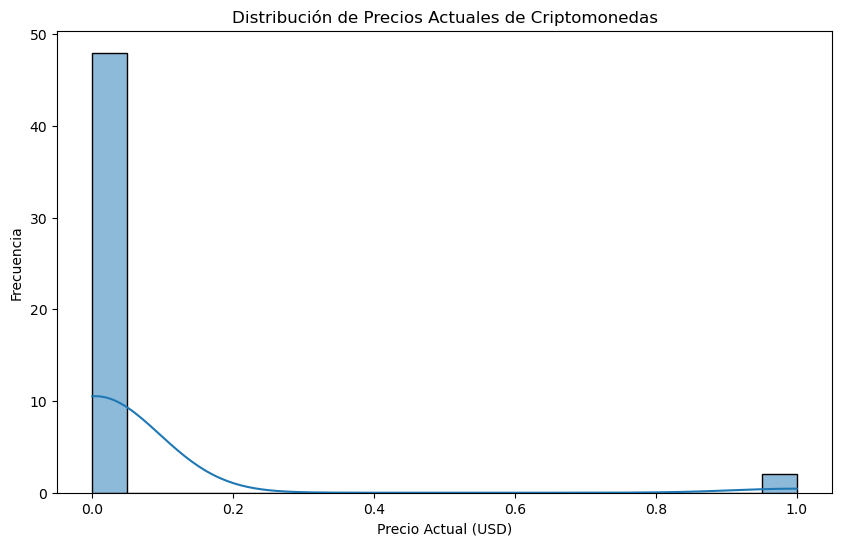

In [30]:
# Distribución de precios actuales
plt.figure(figsize=(10, 6))
sns.histplot(df['current_price'], bins=20, kde=True)
plt.title('Distribución de Precios Actuales de Criptomonedas')
plt.xlabel('Precio Actual (USD)')
plt.ylabel('Frecuencia')
plt.show()

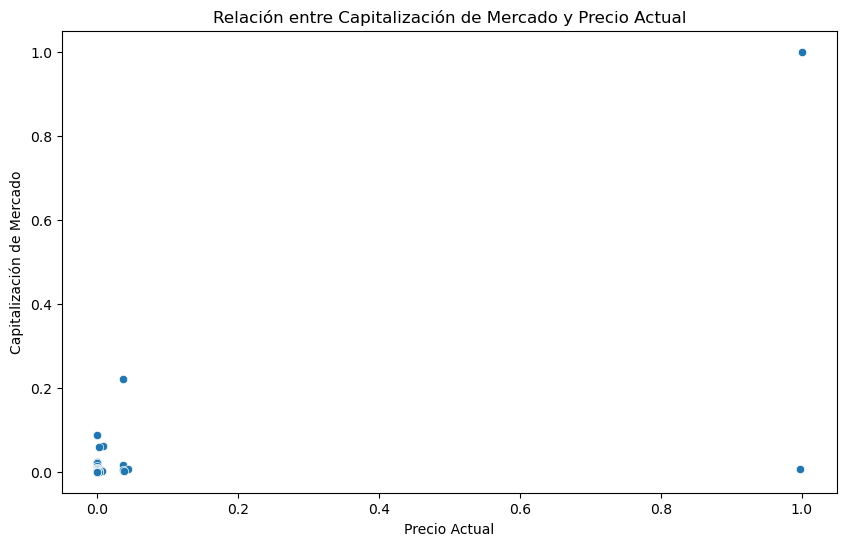

In [31]:
# Gráfico de dispersión de Capitalización de Mercado vs Precio Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='current_price', y='market_cap', data=df)
plt.title('Relación entre Capitalización de Mercado y Precio Actual')
plt.xlabel('Precio Actual')
plt.ylabel('Capitalización de Mercado')
plt.show()

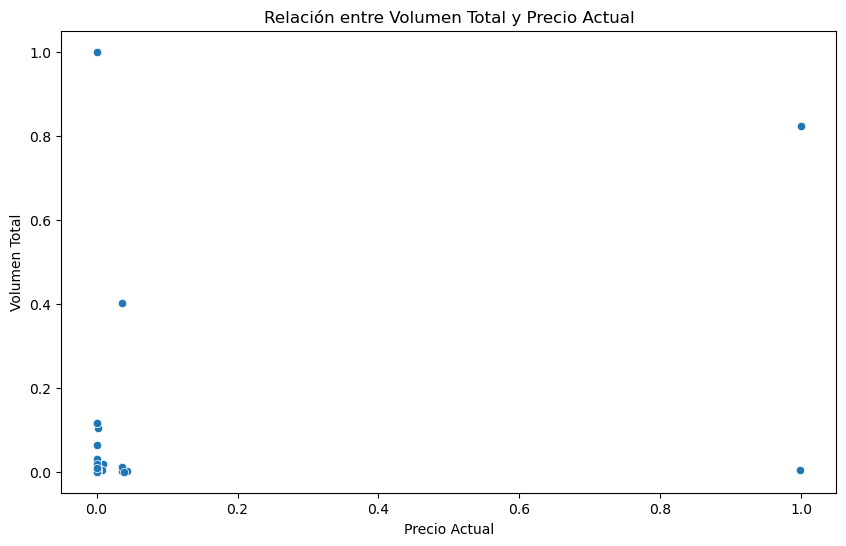

In [32]:
# Gráfico de dispersión de Volumen Total vs Precio Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='current_price', y='total_volume', data=df)
plt.title('Relación entre Volumen Total y Precio Actual')
plt.xlabel('Precio Actual')
plt.ylabel('Volumen Total')
plt.show()

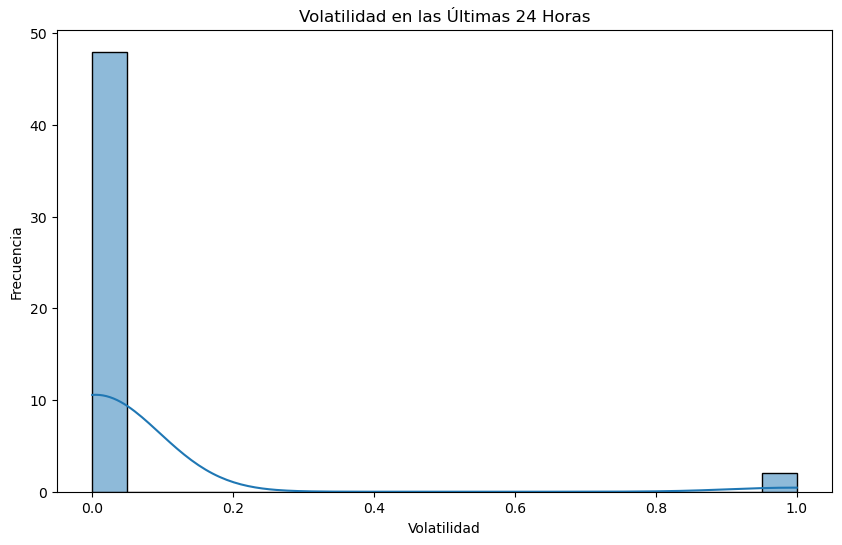

In [33]:
# Histograma de volatilidad en las últimas 24 horas
if 'volatility_24h' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['volatility_24h'], bins=20, kde=True)
    plt.title('Volatilidad en las Últimas 24 Horas')
    plt.xlabel('Volatilidad')
    plt.ylabel('Frecuencia')
    plt.show()

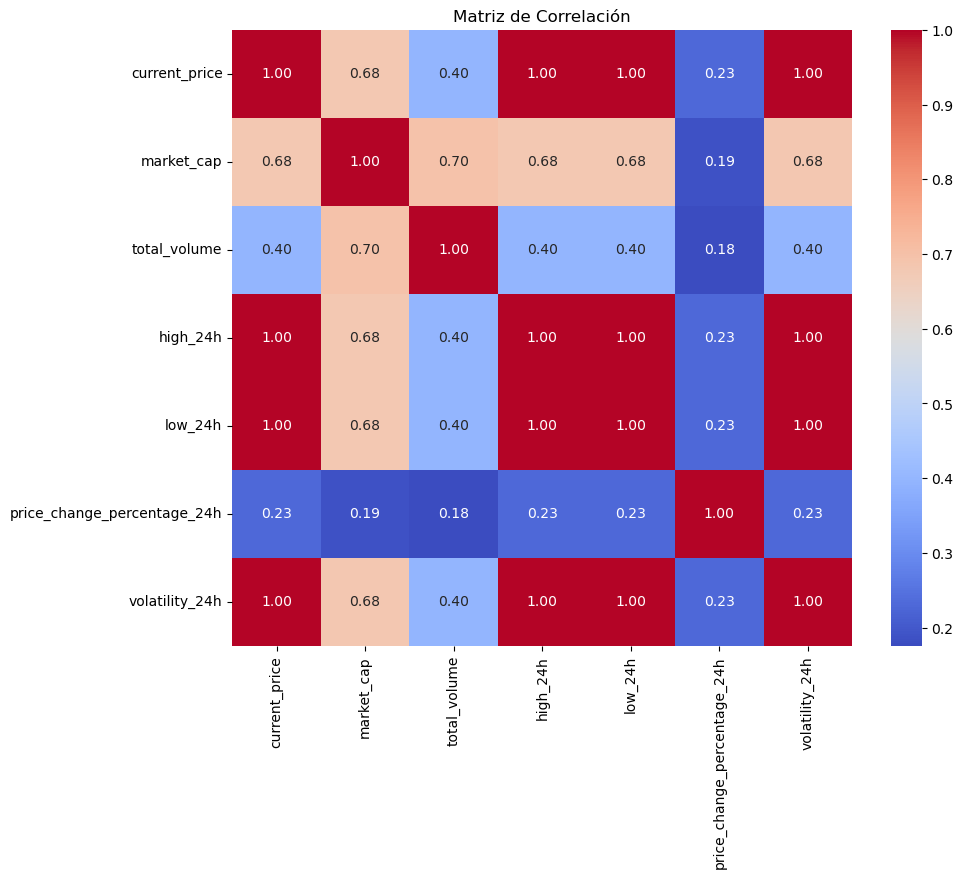

In [34]:
# Heatmap de correlación
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Filtrar solo columnas numéricas
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [37]:
# Paso 4: Preparación de Características para Machine Learning

# Creación de nuevas características si existen las columnas necesarias
if 'volatility_24h' in df.columns and 'current_price' in df.columns:
    df['volatility_ratio'] = df['volatility_24h'] / (df['current_price'] + 1e-9)
if 'price_change_percentage_7d' in df.columns and 'price_change_percentage_24h' in df.columns:
    df['price_change_ratio_7d_24h'] = df['price_change_percentage_7d'] / (df['price_change_percentage_24h'] + 1e-9)


In [38]:
# Eliminar columnas no relevantes
columns_to_drop = ['id', 'symbol', 'name']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df_ml = df.drop(columns=columns_to_drop)

In [39]:
print("DataFrame Final para ML:")
print(df_ml.head())

DataFrame Final para ML:
   current_price  market_cap  total_volume   high_24h       low_24h  \
0       1.000000    1.000000      0.823367  69218.000  67467.000000   
1       0.036518    0.221279      0.400936   2537.880   2471.440000   
2       0.000015    0.087253      1.000000      1.002      0.997197   
3       0.008618    0.062239      0.017796    597.150    585.100000   
4       0.002536    0.058841      0.102931    178.090    173.190000   

   price_change_percentage_24h  volatility_24h  volatility_ratio  
0                      1.45186        1.000000          1.000000  
1                      0.38206        0.037944          1.039036  
2                      0.11060        0.000003          0.188532  
3                      0.79677        0.006882          0.798518  
4                     -0.77343        0.002798          1.103484  


In [40]:
df_ml.to_csv('crypto_data_ml_ready.csv', index=False)